# P5 Optimiser la gestion des données d'une boutique avec Python

### importation des packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### création des dataframes

In [2]:
df_produit = pd.read_excel('erp.xlsx')
df_vente_web = pd.read_excel('web.xlsx')
df_liaison = pd.read_excel('liaison.xlsx')

C:\Users\Pablo\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## exploration des données

In [3]:
df_vente_web.describe()
# je constate qu'il y a de nombreuses colonnes qui contiennent uniquement des valeurs nulles ou des '0'
# on peut aussi voir qu'il manque des données (dans la colonne "average_rating" par exemple, nous avons seulement 1430 valeurs)

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.005594,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.511054,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [4]:
# il a l'air d'avoir des doublons pour chaque produit
# il y a des lignes avec uniquement des valeurs manquantes
df_vente_web.sort_values(['sku','post_type']).head(15)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,304,0,0,0,0.0,40.0,NaN,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,523,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-06 15:25:58,...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
6,523,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,531,0,0,0,0.0,13.0,NaN,NaN,2.0,2018-07-18 15:58:02,...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
8,531,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-07-18 15:58:02,...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Nétoyage des données

In [5]:
df_vente_web.shape

(1513, 28)

In [6]:
# suppression des colonnes inutiles
df_vente_web = df_vente_web.drop(['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_author','post_content','post_status','comment_status','ping_status','post_password','post_content_filtered','post_parent','guid','menu_order','post_mime_type','comment_count'], axis=1)

In [7]:
# suppression des doublons
df_vente_web = df_vente_web.sort_values(['sku','post_type']).drop_duplicates(subset = ['sku'],keep = 'last')
df_vente_web.sort_values(['sku','post_type'])

,sku,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type
0,38,38.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,product
2,41,0.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,product
4,304,40.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,product
6,523,0.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,product
8,531,13.0,2018-07-18 15:58:02,2018-07-18 13:58:02,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Cuvée bien équilibrée à la fois vive et souple...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,product
...,...,...,...,...,...,...,...,...,...,...
1422,19822,0.0,2018-11-26 10:59:10,2018-11-26 09:59:10,Tempier Bandol Cabassaou 2017,"<div id=""wrapper"">\n<div id=""container-wrapper...",tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,product
1424,13127-1,0.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,product
1428,SA1430:S1459,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
1426,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,product


In [8]:
# j'affiche les valeurs nulles
df_vente_web[df_vente_web.isna().any(axis=1)]

,sku,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type
1428,SA1430:S1459,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
1512,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN


In [9]:
df_liaison[df_liaison['id_web']=="SA1430:S1459"]

,product_id,id_web


In [10]:
# suppression des valeurs nulles
df_vente_web = df_vente_web.dropna(subset = ['total_sales'])
df_vente_web

,sku,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type
0,38,38.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,product
2,41,0.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,product
4,304,40.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,product
6,523,0.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,product
8,531,13.0,2018-07-18 15:58:02,2018-07-18 13:58:02,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Cuvée bien équilibrée à la fois vive et souple...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,product
...,...,...,...,...,...,...,...,...,...,...
1418,19820,0.0,2018-11-26 10:54:29,2018-11-26 09:54:29,Tempier Bandol Migoua 2017,"<div id=""wrapper"">\n<div id=""container-wrapper...",tempier-bandol-migoua-2017,2019-11-02 12:59:44,2019-11-02 11:59:44,product
1420,19821,0.0,2018-11-26 10:56:30,2018-11-26 09:56:30,Tempier Bandol Tourtine 2017,"<div id=""wrapper"">\n<div id=""container-wrapper...",tempier-bandol-tourtine-2017,2019-11-02 12:59:24,2019-11-02 11:59:24,product
1422,19822,0.0,2018-11-26 10:59:10,2018-11-26 09:59:10,Tempier Bandol Cabassaou 2017,"<div id=""wrapper"">\n<div id=""container-wrapper...",tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,product
1424,13127-1,0.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,product


In [11]:
# compter le nombre de produit
df_vente_web[df_vente_web['post_type']=="product"].count()

sku                  714
total_sales          714
post_date            714
post_date_gmt        714
post_title           714
post_excerpt         714
post_name            714
post_modified        714
post_modified_gmt    714
post_type            714
dtype: int64

## Liaison des dataframes

In [12]:
# je commence par jeter un oeil aux nombres de valeurs que contiennent les dataframes
df_vente_web.shape

(714, 10)

In [13]:
df_liaison.shape

(825, 2)

In [14]:
df_produit.shape

(825, 5)

In [15]:
df_produit.head(1)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock


In [16]:
df_vente_web.head(1)

,sku,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type
0,38,38.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,product


In [17]:
# je réalise une première liaison entre la table produit (erp) et la table liaison
df_liaison_produit = pd.merge(df_liaison,df_produit,how='outer', left_on = 'product_id', right_on = 'product_id', indicator=True)
df_liaison_produit

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both
...,...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock,both
821,7204,NaN,0,45.0,9,instock,both
822,7247,13127-1,1,54.8,23,instock,both
823,7329,14680-1,0,26.5,14,instock,both


In [18]:
# je constate que tous les produit ont une correspondance dans la table liaison
df_liaison_produit[df_liaison_produit['_merge']!="both"]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge


In [19]:
# je réalise une autre liaison entre la table vente web et la table liaison
df_liaison_vente_web = pd.merge(df_liaison,df_vente_web,how='outer', left_on = 'id_web', right_on = 'sku', indicator=True)
df_liaison_vente_web

,product_id,id_web,sku,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge
0,3847,15298,15298,6.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,product,both
1,3849,15296,15296,0.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,product,both
2,3850,15300,15300,0.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,product,both
3,4032,19814,19814,3.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,product,both
4,4039,19815,19815,0.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,product,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,15891,15891,0.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,product,both
821,7025,15887,15887,0.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,product,both
822,7247,13127-1,13127-1,0.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,product,both
823,7329,14680-1,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only


In [20]:
# je constate que 111 produits sont dans la table liaison et n'ont pas de correspondance dans la table web
df_liaison_vente_web[df_liaison_vente_web['_merge']=="left_only"]

,product_id,id_web,sku,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge
19,4055,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
20,4090,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
21,4092,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
22,4195,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
23,4209,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,15609,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
718,5955,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
720,5957,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
743,6100,15529,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only


In [21]:
# à l'inverse tous les produit de la table web ont une correspondance dans la table liaison
df_liaison_vente_web[df_liaison_vente_web['_merge']=="right_only"]

,product_id,id_web,sku,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge


In [22]:
# je fais ensuite une liaison entre les deux dataframes que je viens de créer
df_produit_vente_web = pd.merge(df_liaison_produit.drop(['id_web','_merge'],axis=1),df_liaison_vente_web.drop(['sku'],axis=1),how='outer',left_on = 'product_id',right_on='product_id')
df_produit_vente_web

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,product,both
1,3849,1,34.3,0,outofstock,15296,0.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,product,both
2,3850,1,20.8,0,outofstock,15300,0.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,product,both
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,product,both
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,product,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
821,7204,0,45.0,9,instock,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
822,7247,1,54.8,23,instock,13127-1,0.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,product,both
823,7329,0,26.5,14,instock,14680-1,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only


## Calcul du CA

In [23]:
# je commence par créer une colonne chiffre d'affaire pour chaque produit
df_produit_vente_web['chiffre d affaire'] = df_produit_vente_web['price']*df_produit_vente_web['total_sales']
df_produit_vente_web['chiffre d affaire'].head(10)

0    145.2
1      0.0
2      0.0
3     42.3
4      0.0
5      0.0
6      0.0
7    218.4
8    180.0
9    596.4
Name: chiffre d affaire, dtype: float64

In [24]:
# Calcul du CA total des ventes en ligne
df_produit_vente_web['chiffre d affaire'].sum()

70463.8

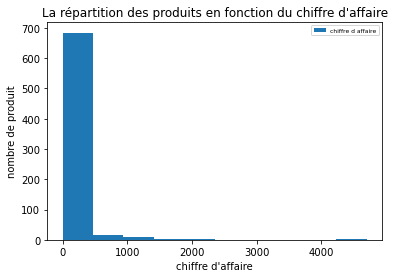

In [42]:
# Calcul du CA total des ventes en ligne
df_produit_vente_web['chiffre d affaire'].plot.hist()
plt.title("La répartition des produits en fonction du chiffre d'affaire")
plt.xlabel("chiffre d'affaire")
plt.ylabel('nombre de produit')
plt.legend(prop = {'size':6})

In [26]:
# Calcul du CA total des ventes en ligne
df_produit_vente_web[df_produit_vente_web['chiffre d affaire']>4000]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge,chiffre d affaire
74,4144,1,49.0,11,instock,1662,87.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,product,both,4263.0
203,4334,1,49.0,0,outofstock,7818,96.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,product,both,4704.0


In [27]:
# Calcul du CA total des ventes en ligne
df_produit_vente_web['chiffre d affaire'].describe()

count     714.000000
mean       98.688796
std       307.707218
min         0.000000
25%         0.000000
50%        15.200000
75%        90.750000
max      4704.000000
Name: chiffre d affaire, dtype: float64

## Identification des outliers / IQR Method

In [28]:
# j'utilise la fonction describe pour avoir les quartiles des données des prix et des ventes
df_produit_vente_web[['price','total_sales']].describe()

,price,total_sales
count,825.000000,714.000000
mean,32.415636,4.009804
std,26.795849,8.519175
min,5.200000,0.000000
25%,14.600000,0.000000
50%,24.400000,1.000000
75%,42.000000,4.000000
max,225.000000,96.000000


In [29]:
# je calcule les IQR des données des prix et des ventes
iqr_price = np.quantile(df_produit_vente_web['price'],0.75)-np.quantile(df_produit_vente_web['price'],0.25)
iqr_sales = np.quantile(df_produit_vente_web['total_sales'],0.75)-np.quantile(df_produit_vente_web['total_sales'],0.25)

In [30]:
# je détermine les valeurs prix abérantes (+) avec la méthode IQR
df_produit_vente_web[df_produit_vente_web['price']>(1.5*iqr_price+np.quantile(df_produit_vente_web['price'],0.75))]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge,chiffre d affaire
19,4055,0,86.1,0,outofstock,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only,NaN
66,4115,1,100.0,11,instock,15382,0.0,2018-02-13 11:08:45,2018-02-13 10:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,product,both,0.0
68,4132,1,88.4,5,instock,11668,0.0,2018-02-13 11:43:55,2018-02-13 10:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,product,both,0.0
208,4352,1,225.0,0,outofstock,15940,5.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,product,both,1125.0
210,4355,1,126.5,2,instock,12589,11.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,product,both,1391.5
214,4359,1,85.6,0,outofstock,13853,1.0,2018-03-02 11:11:48,2018-03-02 10:11:48,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,product,both,85.6
227,4402,1,176.0,8,instock,3510,13.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,product,both,2288.0
228,4404,1,108.5,2,instock,3507,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,product,both,217.0
230,4406,1,157.0,3,instock,7819,0.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,product,both,0.0
231,4407,1,104.0,6,instock,3509,1.0,2018-03-22 11:49:53,2018-03-22 10:49:53,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,product,both,104.0


In [39]:
# je cherche le nombre d'outliers
(df_produit_vente_web[df_produit_vente_web['price']>(1.5*iqr_price+np.quantile(df_produit_vente_web['price'],0.75))]).count()

product_id           37
onsale_web           37
price                37
stock_quantity       37
stock_status         37
id_web               33
total_sales          33
post_date            33
post_date_gmt        33
post_title           33
post_excerpt         33
post_name            33
post_modified        33
post_modified_gmt    33
post_type            33
_merge               37
chiffre d affaire    33
dtype: int64

In [31]:
# je détermine les valeurs des ventes abérantes (+) avec la méthode IQR
df_produit_vente_web[df_produit_vente_web['total_sales']>(1.5*iqr_sales+np.quantile(df_produit_vente_web['total_sales'],0.75))].sort_values('total_sales',ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge,chiffre d affaire


<AxesSubplot:>

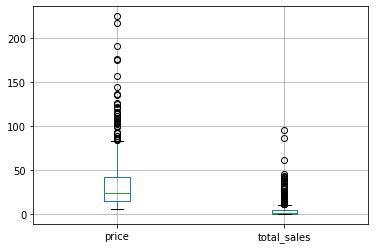

In [32]:
# j'affiche un boxplot pour identifier les valeurs qui se détachent de la masse
df_produit_vente_web.boxplot(column=['price','total_sales'])

In [33]:
# je cherche les produits qui ont des données de prix abérantes
df_produit_vente_web[df_produit_vente_web['price']>150]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge,chiffre d affaire
208,4352,1,225.0,0,outofstock,15940,5.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,product,both,1125.0
227,4402,1,176.0,8,instock,3510,13.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,product,both,2288.0
230,4406,1,157.0,3,instock,7819,0.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,product,both,0.0
460,5001,1,217.5,20,instock,14581,0.0,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,product,both,0.0
598,5767,1,175.0,12,instock,15185,0.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,product,both,0.0
635,5892,1,191.3,10,instock,14983,3.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,product,both,573.9


In [34]:
# je cherche les produits qui ont des données de vente abérantes
df_produit_vente_web[df_produit_vente_web['total_sales']>50]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,post_type,_merge,chiffre d affaire
31,4068,1,16.6,157,instock,16416,62.0,2018-02-12 13:42:28,2018-02-12 12:42:28,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 16:05:04,2020-08-27 14:05:04,product,both,1029.2
74,4144,1,49.0,11,instock,1662,87.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,product,both,4263.0
203,4334,1,49.0,0,outofstock,7818,96.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,product,both,4704.0
